In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import time
import bacteria_numba_no_saturation as bacnosat
import bacteria_numba as bacsat
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
r = 0.69#/(3600) # s⁻¹
k = 0.1
chi = 315/1000 # μm²/ms
gamma = r/k
lambd = 1.25
q = 1.5#/1e5 # μM/100s
beta = 1
alpha = 1

D_b = 50.2/1000 # μm²/ms
D_s = 800/1000 # μm²/ms
t_c = 10
t_f = 400
t_max = 100000000#*(t_c/128)
dt_size = 64
x_max = 5
x_L = x_max/2
dx = 0.1
n = int(x_max/dx)
S_plus = 30 # μM
S_minus = 1 # μM
S_max = 1 # μM
save_every = 1

# Initial condition
S = np.zeros(n)
# rho1 = np.random.uniform(0.04, 0.04, n)
# rho2 = rho1.copy()
rho = np.random.uniform(0.04, 0.04, n)

print('\nReady to run simulations. Making a test before starting \n')

test = bacsat.solve_model(5, rho, S, 0, 10, n, D_s, D_b, chi, r, k, lambd, 1, 5, 0.6,
                   beta, S_plus, S_minus, S_max, 32, save_every)

print("\nTest concluded. Proceeding with simulation... \n")

# Initial condition
S = np.zeros(n)
# rho1 = np.random.uniform(0.04, 0.04, n)
# rho2 = rho1.copy()
rho = np.random.uniform(k, k, n)

# rhos1, rhos2, Ss, tot_rho1, tot_rho2, tot_S, idx, dx, dt, x = solve_model(t_max, rho1, rho2, S, 0,
#                                                                            x_max, n, D_s, D_b, chi,
#                                                                            r, k, lambd, t_c, t_f, x_L,
#                                                                            q, beta, dt_size, alpha,
#                                                                            S_plus, S_minus, S_max)
rhos, Ss, tot_rho, tot_S, death_by_competition, death_by_substance, idx, dx, dt, x = bacsat.solve_model(t_max, rho, S, 0,
                                                        x_max, n, D_s, D_b, chi,
                                                        r, k, lambd, t_c, x_L,
                                                        q, beta, S_plus, S_minus, S_max, dt_size, save_every)


Ready to run simulations. Making a test before starting 

0.2
0.012450199203187254
Still computing... step: 0

Test concluded. Proceeding with simulation... 

0.1
0.0015562749003984067
Still computing... step: 0


In [9]:
r = 0.69#/(3600) # s⁻¹
k = 0.1
chi = 315/1000 # μm²/ms
gamma = r/k
lambd = 1.25
q = 1.5#/1e5 # μM/100s
beta = 1
alpha = 1

D_b = 50.2/1000 # μm²/ms
D_s = 800/1000 # μm²/ms
t_c = 10
t_f = 400
t_max = 1000000000#*(t_c/128)
dt_size = 64
x_max = 15
x_L = x_max/2
dx = 0.1
n = int(x_max/dx)
S_plus = 30 # μM
S_minus = 1 # μM
S_max = 1 # μM
save_every = 1

# Initial condition
S = np.zeros(n)
# rho1 = np.random.uniform(0.04, 0.04, n)
# rho2 = rho1.copy()
rho = np.random.uniform(0.04, 0.04, n)

print('\nReady to run simulations. Making a test before starting \n')

test = bacsat.solve_model(5, rho, S, 0, 10, n, D_s, D_b, chi, r, k, lambd, 1, 5, 0.6,
                   beta, S_plus, S_minus, S_max, 32, save_every)

print("\nTest concluded. Proceeding with simulation... \n")

# Initial condition
S = np.zeros(n)
# rho1 = np.random.uniform(0.04, 0.04, n)
# rho2 = rho1.copy()
rho = np.random.uniform(k, k, n)

# rhos1, rhos2, Ss, tot_rho1, tot_rho2, tot_S, idx, dx, dt, x = solve_model(t_max, rho1, rho2, S, 0,
#                                                                            x_max, n, D_s, D_b, chi,
#                                                                            r, k, lambd, t_c, t_f, x_L,
#                                                                            q, beta, dt_size, alpha,
#                                                                            S_plus, S_minus, S_max)
rhos2, Ss2, tot_rho2, tot_S2, death_by_competition2, death_by_substance2, idx2, dx2, dt2, x2 = bacsat.solve_model(t_max, rho, S, 0,
                                                        x_max, n, D_s, D_b, chi,
                                                        r, k, lambd, t_c, x_L,
                                                        q, beta, S_plus, S_minus, S_max, dt_size, save_every)


Ready to run simulations. Making a test before starting 

0.06666666666666667
0.0013833554670208057
Still computing... step: 0

Test concluded. Proceeding with simulation... 

0.1
0.0015562749003984067
Still computing... step: 0


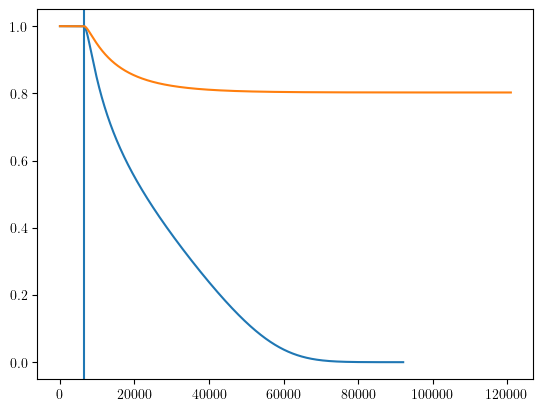

In [11]:
plt.plot(np.array(tot_rho)/(k*5))
# plt.plot(np.array(tot_S))
plt.axvline(10/0.00155)
plt.plot(np.array(tot_rho2)/(k*15))
# plt.xscale('log')
plt.show()

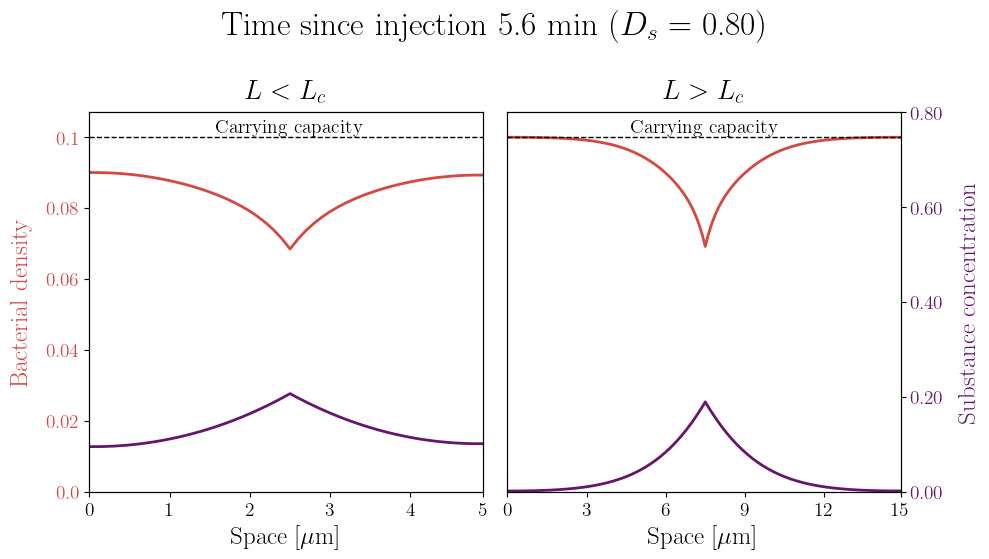

In [44]:
index = 10000

fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(rhos[index], lw = 2, color = sns.color_palette('inferno')[3])
ax[0].set_xlim(0, 49)
ax[0].set_ylim(0, 0.107)
ax[0].axhline(0.1, lw = 1, ls = '--', color = 'black')
ax[0].set_xticks([0,10,20,30,40,49])
ax[0].set_xticklabels(labels = [0,1,2,3,4,5], fontsize = 14)
ax[0].set_xlabel(r'Space [$\mu \mathrm{m}$]', fontsize = 18)
ax[0].set_yticklabels(ax[0].get_yticks(), fontsize = 14, color = sns.color_palette('inferno')[3])
ax[0].set_title(r'$L < L_c$', fontsize = 20, pad = 10)
ax[0].set_ylabel('Bacterial density', fontsize = 18, color = sns.color_palette('inferno')[3],
                weight = 'bold', labelpad = 10)
ax[0].text(25, 0.105, 'Carrying capacity', fontsize = 14, va = 'top', ha = 'center')

ax2 = ax[0].twinx()
ax2.plot(Ss[index], lw = 2, color = sns.color_palette('inferno')[1])
ax2.set_ylim(0, 0.8)
ax2.set_yticks([])

##########################################################################
ax[1].plot(rhos2[index], lw = 2, color = sns.color_palette('inferno')[3])
ax[1].set_xlim(0, 149)
ax[1].set_ylim(0, 0.107)
ax[1].axhline(0.1, lw = 1, ls = '--', color = 'black')
ax[1].set_xticks([0,30,60,90,120,149])
ax[1].set_xticklabels(labels = [0,3,6,9,12,15], fontsize = 14)
ax[1].set_xlabel(r'Space [$\mu \mathrm{m}$]', fontsize = 18)
ax[1].set_yticks([])
ax[1].set_title(r'$L > L_c$', fontsize = 20, pad = 10)
ax[1].text(75, 0.105, 'Carrying capacity', fontsize = 14, va = 'top', ha = 'center')

ax3 = ax[1].twinx()
ax3.plot(Ss2[index], lw = 2, color = sns.color_palette('inferno')[1])
ax3.set_ylim(0, 0.8)
ax3.set_yticks([0,0.2,0.4,0.6,0.8])
ax3.set_yticklabels([f"{ax3.get_yticks()[i]:.2f}" for i in range(len(ax3.get_yticks()))],
                    fontsize = 14, color = sns.color_palette('inferno')[1])
ax3.set_ylabel('Substance concentration', fontsize = 18, weight = 'bold',
               color = sns.color_palette('inferno')[1], labelpad = 10)

fig.text(0.5, 1.06, f'Time since injection {(index*dt - 10):.1f} min ($D_s$ = {D_s:.2f})', ha = 'center', fontsize = 24)
plt.tight_layout()
fig.patch.set_alpha(0.2)
plt.savefig(f'Plots/Profile_scenarios_L_more_L_c_t={(index*dt - 10):.2f}.png',
            dpi = 300, bbox_inches = 'tight')
plt.savefig(f'Plots/Profile_scenarios_L_less_L_c_t={(index*dt - 10):.2f}.svg',
            dpi = 300, bbox_inches = 'tight')
plt.show()

In [45]:
for i in tqdm(range(6450,80000)):
    if i % 600 == 0:
        index = i
        fig, ax = plt.subplots(1, 2, figsize = (10,5))
        ax[0].plot(rhos[index], lw = 2, color = sns.color_palette('inferno')[3])
        # plt.plot(Ss[240000])
        ax[0].set_xlim(0, 49)
        ax[0].set_ylim(0, 0.107)
        ax[0].axhline(0.1, lw = 1, ls = '--', color = 'black')
        ax[0].set_xticks([0,10,20,30,40,49])
        ax[0].set_xticklabels(labels = [0,1,2,3,4,5], fontsize = 14)
        ax[0].set_xlabel(r'Space [$\mu \mathrm{m}$]', fontsize = 18)
        ax[0].set_yticklabels(ax[0].get_yticks(), fontsize = 14, color = sns.color_palette('inferno')[3])
        ax[0].set_title(r'$L < L_c$', fontsize = 20, pad = 10)
        ax[0].set_ylabel('Bacterial density', fontsize = 18, color = sns.color_palette('inferno')[3],
                        weight = 'bold', labelpad = 10)
        ax[0].text(25, 0.105, 'Carrying capacity', fontsize = 14, va = 'top', ha = 'center')

        ax2 = ax[0].twinx()
        ax2.plot(Ss[index], lw = 2, color = sns.color_palette('inferno')[1])
        ax2.set_ylim(0, 1)
        ax2.set_yticks([])

        ##########################################################################
        ax[1].plot(rhos2[index], lw = 2, color = sns.color_palette('inferno')[3])
        # plt.plot(Ss[240000])
        ax[1].set_xlim(0, 149)
        ax[1].set_ylim(0, 0.107)
        ax[1].axhline(0.1, lw = 1, ls = '--', color = 'black')
        ax[1].set_xticks([0,30,60,90,120,149])
        ax[1].set_xticklabels(labels = [0,3,6,9,12,15], fontsize = 14)
        ax[1].set_xlabel(r'Space [$\mu \mathrm{m}$]', fontsize = 18)
        ax[1].set_yticks([])
        ax[1].set_title(r'$L > L_c$', fontsize = 20, pad = 10)
        ax[1].text(75, 0.105, 'Carrying capacity', fontsize = 14, va = 'top', ha = 'center')

        ax3 = ax[1].twinx()
        ax3.plot(Ss2[index], lw = 2, color = sns.color_palette('inferno')[1])
        ax3.set_ylim(0, 1)
        ax3.set_yticks([0,0.25,0.5,0.75,1])
        ax3.set_yticklabels([f"{ax3.get_yticks()[i]:.2f}" for i in range(len(ax3.get_yticks()))],
                            fontsize = 14, color = sns.color_palette('inferno')[1])
        ax3.set_ylabel('Substance concentration', fontsize = 18, weight = 'bold',
                       color = sns.color_palette('inferno')[1], labelpad = 10)

        fig.text(0.5, 1.06, f'Time since injection {(index*dt - 10):.1f} min', ha = 'center', fontsize = 24)
        plt.tight_layout()
        # fig.patch.set_alpha(0.2)
        plt.savefig(f'Plots/Gifs/Profile_scenarios_L_more_L_c_t={(index*dt - 10):.2f}.png',
                    dpi = 300, bbox_inches = 'tight')
        plt.close()
# plt.show()

100%|██████████| 73550/73550 [01:41<00:00, 727.02it/s]
